In [3]:
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
from __future__ import division

This function is the result of the below analysis

In [4]:
# a function to detect bell peppers
def find_bell_pepper(image):
    # blur image slightly
    image_blur = cv2.GaussianBlur(image, (7, 7), 0)
    # convert to HSV
    image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
    # define range of yellow color in HSV
    min_red = np.array([170, 100, 80])
    max_red = np.array([180, 256, 256])
    # Threshold the HSV image to get only yellow colors
    mask_red = cv2.inRange(image_blur_hsv, min_red, max_red)
    # clean up
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    mask_red_closed = cv2.morphologyEx(mask_red, cv2.MORPH_CLOSE, kernel)
    mask_red_closed_then_opened = cv2.morphologyEx(mask_red_closed, cv2.MORPH_OPEN, kernel)

    # find contours
    contours, _ = cv2.findContours(mask_red_closed_then_opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # find the biggest contour
    if len(contours) > 0:
        biggest_contour = max(contours, key=cv2.contourArea)
        # find the bounding box of the biggest contour
        x, y, w, h = cv2.boundingRect(biggest_contour)
        # draw the bounding box
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 3)
        # find the center of the bounding box
        center = (int(x+w/2), int(y+h/2))
        # draw the center
        cv2.circle(image, center, 5, (0, 0, 255), -1)
        # return the center
        return center
    else:
        return None

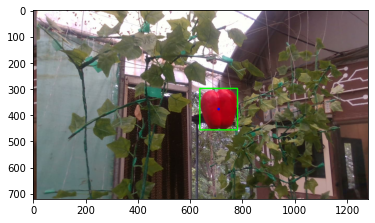

In [7]:
# read the image
image = cv2.imread('new4.jpg')
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# find the bell pepper
center = find_bell_pepper(image)
# display the image
plt.imshow(image)
plt.show()

---

In [27]:
# utility functions
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))
    
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)
    
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
    
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

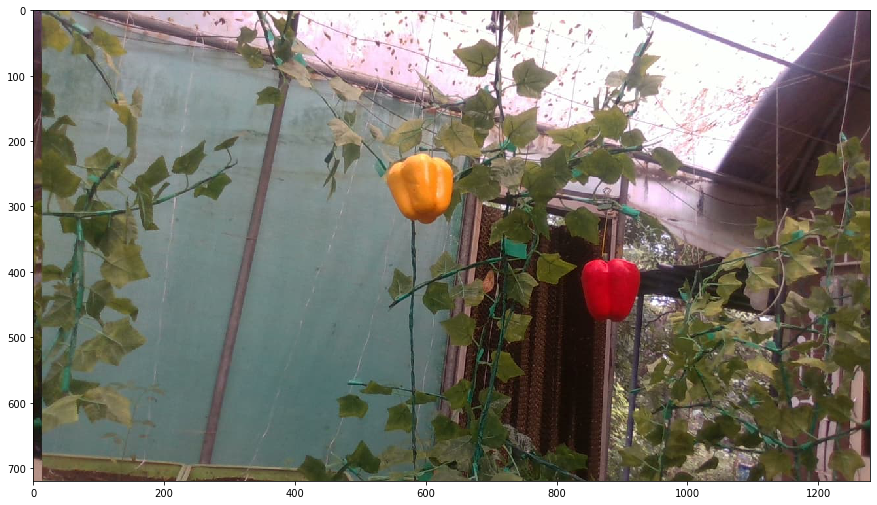

In [28]:
# Read the image
image = cv2.imread('new.jpg')

# Convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show the image
show(image)

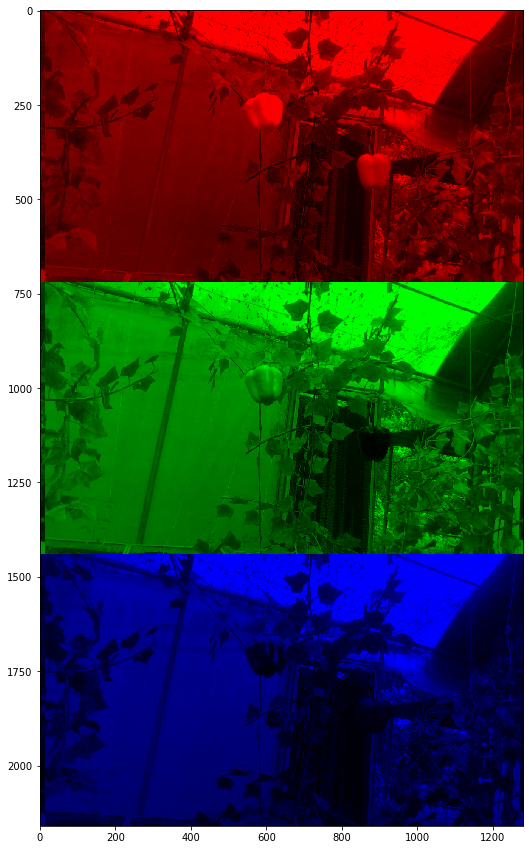

In [29]:
# Show Red/Green/Blue
images = []
for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)
    
show(np.vstack(images))

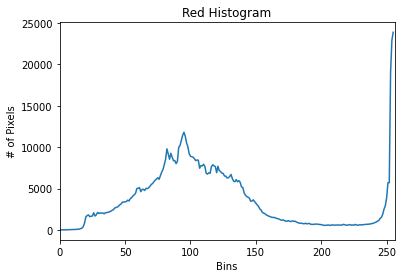

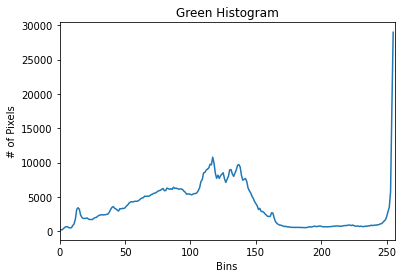

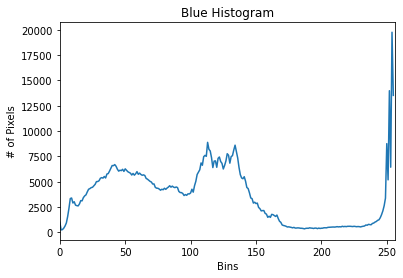

In [30]:
#create a histogram for each color channel
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.figure()
plt.title("Red Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

hist = cv2.calcHist([image], [1], None, [256], [0, 256])
plt.figure()
plt.title("Green Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

hist = cv2.calcHist([image], [2], None, [256], [0, 256])
plt.figure()
plt.title("Blue Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

# show the plots
plt.show()

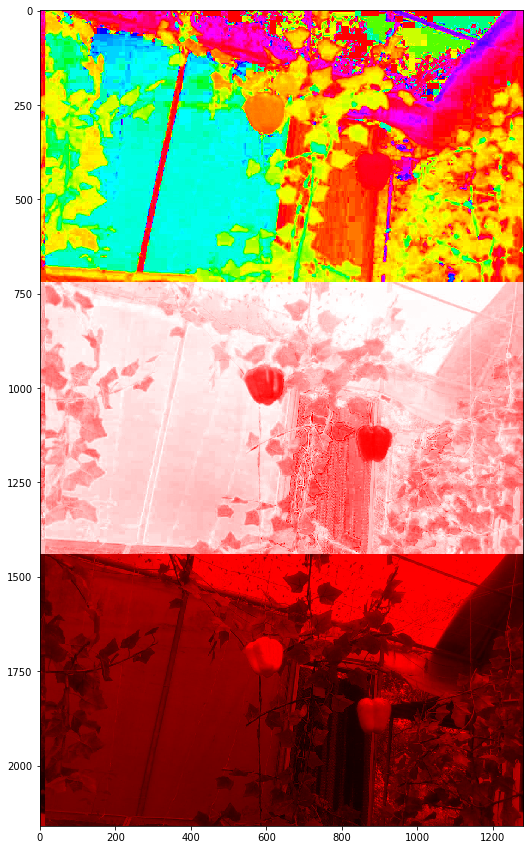

In [31]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 255
    if i != 2: colour[:,:,2] = 255
    images.append(colour)
    
hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)

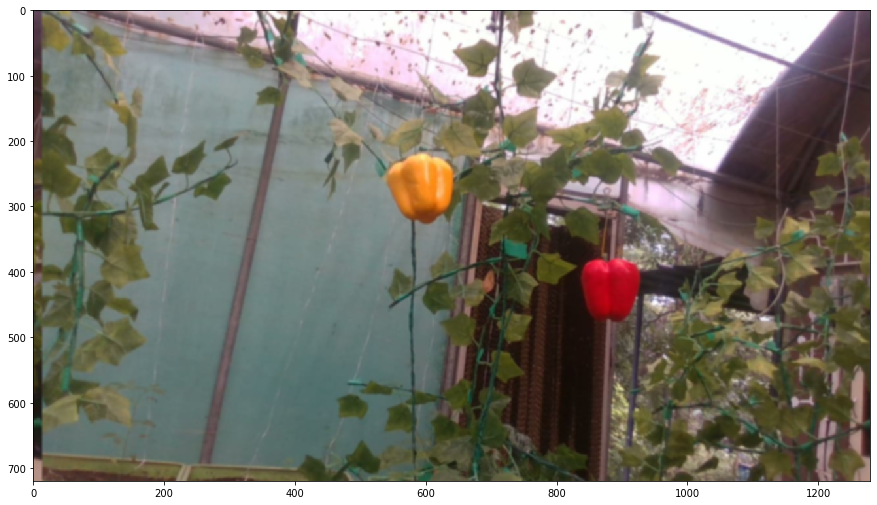

In [32]:
# Blur image slightly
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
show(image_blur)

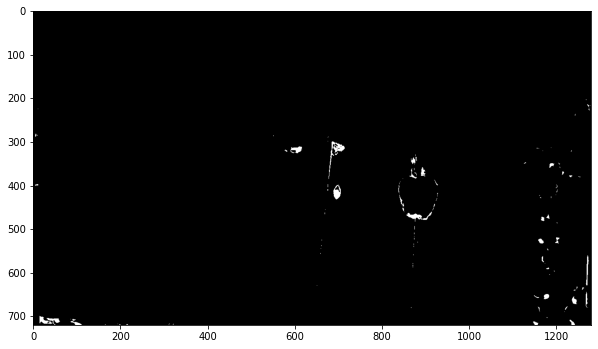

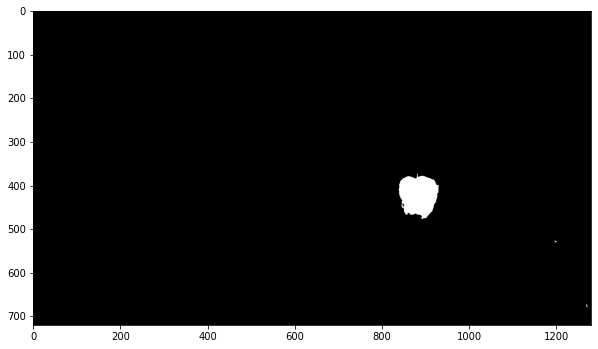

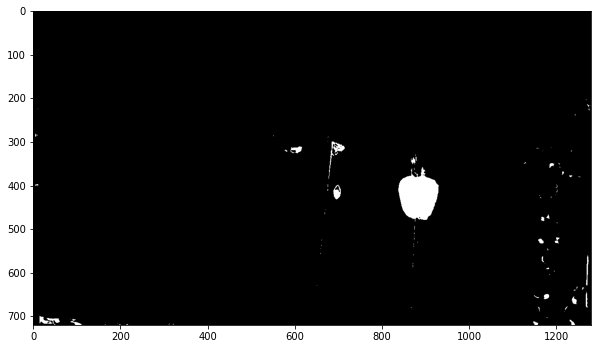

In [33]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_red = np.array([0, 100, 80])
max_red = np.array([10, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

# 170-180 hue
min_red2 = np.array([170, 100, 80])
max_red2 = np.array([180, 256, 256])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

show_mask(image_red1)
show_mask(image_red2)
image_red = image_red1 + image_red2
show_mask(image_red)

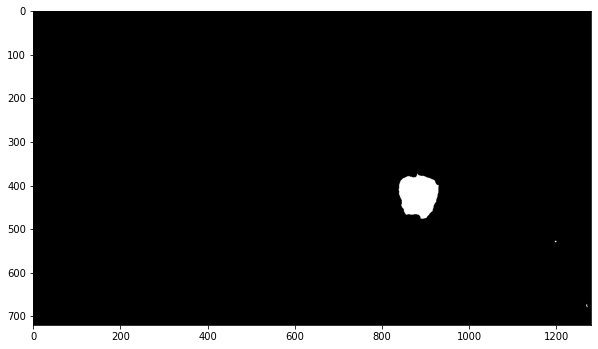

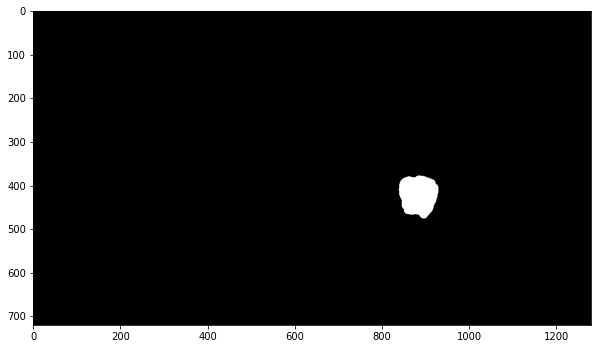

In [34]:
# Clean up
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

# image_red_eroded = cv2.morphologyEx(image_red, cv2.MORPH_ERODE, kernel)
# show_mask(image_red_eroded)

# image_red_dilated = cv2.morphologyEx(image_red, cv2.MORPH_DILATE, kernel)
# show_mask(image_red_dilated)

# image_red_opened = cv2.morphologyEx(image_red, cv2.MORPH_OPEN, kernel)
# show_mask(image_red_opened)

# Fill small gaps
image_red_closed = cv2.morphologyEx(image_red2, cv2.MORPH_CLOSE, kernel)
show_mask(image_red_closed)

# Remove specks
image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_red_closed_then_opened)

1


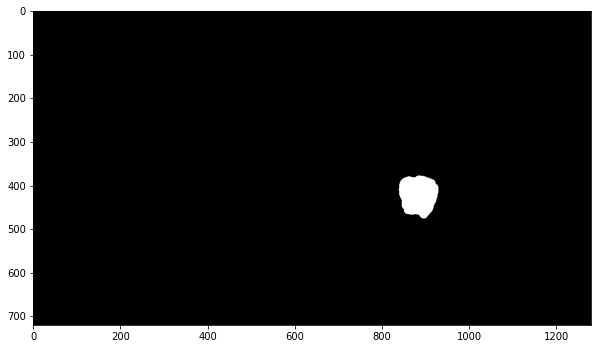

In [35]:
def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, red_mask = find_biggest_contour(image_red_closed_then_opened)
show_mask(red_mask)

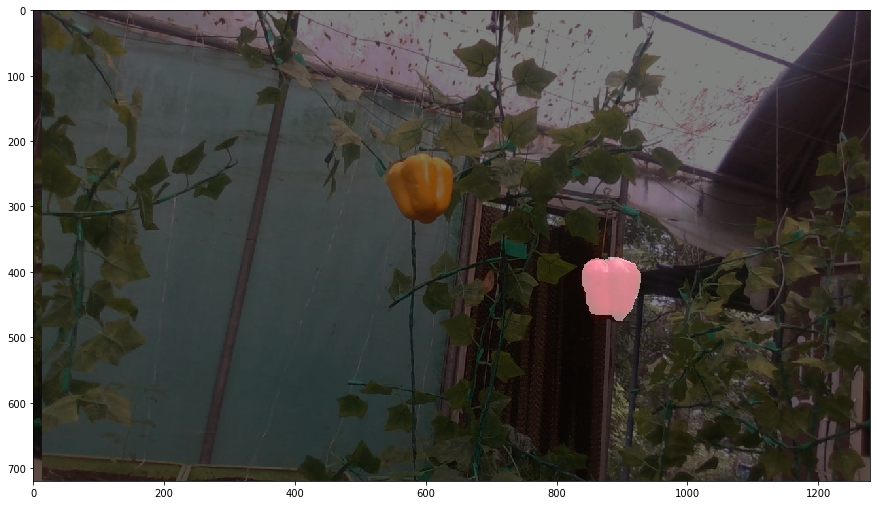

In [36]:
overlay_mask(red_mask, image)

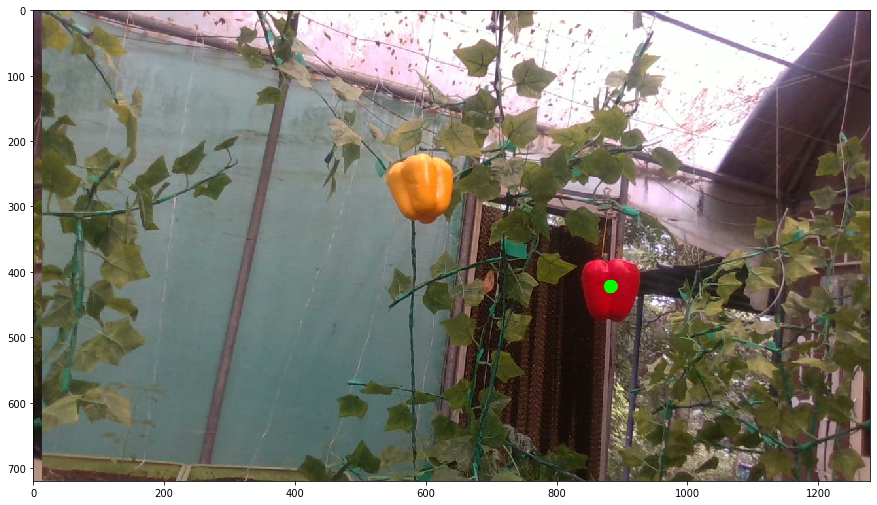

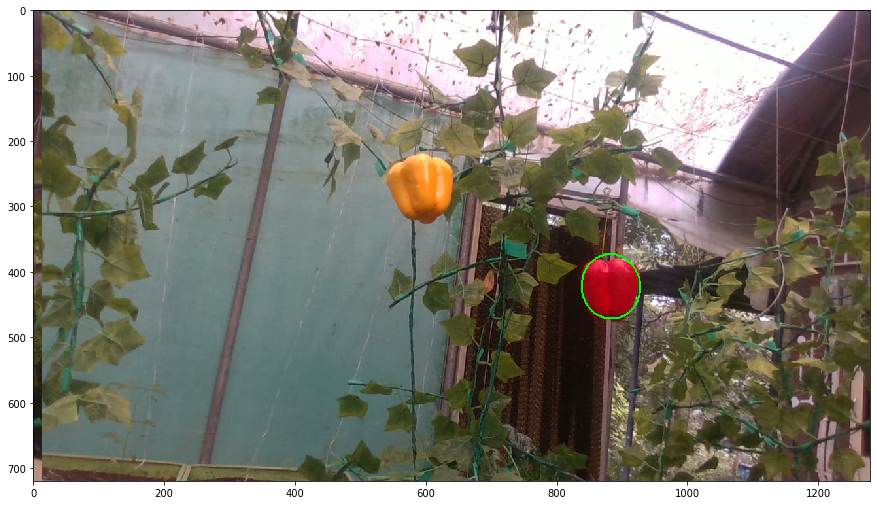

In [37]:
# Centre of mass
moments = cv2.moments(red_mask)
centre_of_mass = int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00'])
image_with_com = image.copy()
cv2.circle(image_with_com, centre_of_mass, 10, (0, 255, 0), -1, cv2.LINE_AA)
show(image_with_com)

# Bounding ellipse
image_with_ellipse = image.copy()
ellipse = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2)
show(image_with_ellipse)